In [3]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import os

# 1. Data Collection

### Collect from first data source ( Kaggle) and clean the dataset

The original dataset downloaded from Kaggle is in CSV format.

In [49]:
# Read the csv file
movies = pd.read_csv('../data/tmdb_movies_data.csv')

In [335]:
# The orginal dataset from Kaggle contains 10866 rows and 21 columns
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [329]:
# Select imdb_id and budget of movies released between 2012 and 2015 with nonzero budget
# Drop the rows with missing values
# Save the data as a dataframe

budget = movies.loc[(movies['release_year'] > 2011) & (movies['release_year'] < 2016) & (movies['budget'] > 0), ['imdb_id','budget']]
budget = budget.dropna().reset_index(drop=True)

In [330]:
# the dataframe has 953 rows and 2 columns
budget

,imdb_id,budget
0,tt0369610,150000000
1,tt1392190,150000000
2,tt2908446,110000000
3,tt2488496,200000000
4,tt2820852,190000000
...,...,...
948,tt2319018,1400000
949,tt2187884,650
950,tt2403029,4500000
951,tt1966566,30000000


### Collect from second data source (RapidAPI) and clean the dataset

In [307]:
# Collect metascores from API 
url = "https://movie-database-alternative.p.rapidapi.com/"

metascore = []

for tt_id in budget['imdb_id']:
    querystring = {"r":"json","i":tt_id}

    headers = {
        "X-RapidAPI-Key": "566b74018dmsh42a245d474fa5f9p18dd45jsnf6ba0fd74133",
        "X-RapidAPI-Host": "movie-database-alternative.p.rapidapi.com"
    }

    response = requests.request("GET", url, headers=headers, params=querystring)
    # get metascore by key ['Metascore']
    score = response.json()['Metascore']
    metascore.append(float(score if score != 'N/A' else 'NaN'))

In [312]:
# add attribute Metascore to the previous budget dataframe
budget['Metascore']=metascore

In [313]:
# the dataframe has 953 rows and 3 columns now
budget

,imdb_id,budget,Metascore
0,tt0369610,150000000,59.0
1,tt1392190,150000000,90.0
2,tt2908446,110000000,42.0
3,tt2488496,200000000,80.0
4,tt2820852,190000000,67.0
...,...,...,...
948,tt2319018,1400000,NaN
949,tt2187884,650,58.0
950,tt2403029,4500000,NaN
951,tt1966566,30000000,49.0


In [316]:
# drop the rows with missing value of metascore
budget_metascore = budget.dropna().reset_index(drop=True)

In [323]:
# the clean dataframe has 777 rows and 3 columns
budget_metascore

,imdb_id,budget,Metascore
0,tt0369610,150000000,59.0
1,tt1392190,150000000,90.0
2,tt2908446,110000000,42.0
3,tt2488496,200000000,80.0
4,tt2820852,190000000,67.0
...,...,...,...
772,tt2361700,1000000,69.0
773,tt1509788,3000000,37.0
774,tt2234155,58000000,42.0
775,tt2187884,650,58.0


In [317]:
# save the dataframe as a csv file: budget_metascore.csv
budget_metascore.to_csv('../data/budget_metascore.csv')

# 2. Analysis and Visualization

In [4]:
dataset = pd.read_csv('../data/budget_metascore.csv',index_col=0)
dataset

,imdb_id,budget,Metascore
0,tt0369610,150000000,59.0
1,tt1392190,150000000,90.0
2,tt2908446,110000000,42.0
3,tt2488496,200000000,80.0
4,tt2820852,190000000,67.0
...,...,...,...
772,tt2361700,1000000,69.0
773,tt1509788,3000000,37.0
774,tt2234155,58000000,42.0
775,tt2187884,650,58.0


### Summary of the whole dataset

Mean, median, min, max, first and third quartiles, and standard deviation of budgets and Metascores in the dataset.


In [8]:
dataset.describe()

,budget,Metascore
count,7.770000e+02,777.000000
mean,4.104488e+07,51.927928
std,5.260989e+07,17.552864
min,1.000000e+01,11.000000
25%,7.700000e+06,39.000000
50%,2.000000e+07,51.000000
75%,5.000000e+07,64.000000
max,2.800000e+08,100.000000


/Users/chengsiwei/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


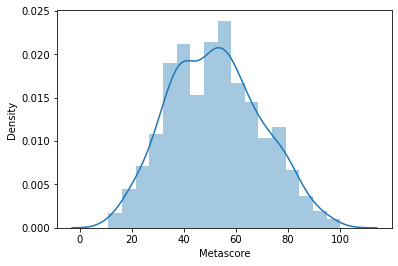

In [29]:
import seaborn as sns
sns.distplot(dataset['Metascore'])
plt.savefig('../result/Histogram and Density of Metascore.pdf')

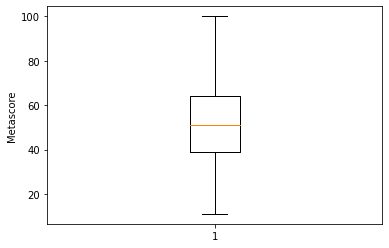

In [33]:
plt.boxplot(dataset['Metascore'])
plt.ylabel('Metascore')
plt.savefig('../result/Box plot of Metascore.pdf')

In [7]:
dataset.loc[dataset['Metascore']<=40, 'class'] = 'Poor'
dataset.loc[(dataset['Metascore']>40) & (dataset['Metascore']<=60), 'class'] = 'Fair'
dataset.loc[(dataset['Metascore']>60) & (dataset['Metascore']<=80), 'class'] = 'Good'
dataset.loc[dataset['Metascore']>80, 'class'] = 'Excellent' 

In [8]:
dataset

,imdb_id,budget,Metascore,class
0,tt0369610,150000000,59.0,Fair
1,tt1392190,150000000,90.0,Excellent
2,tt2908446,110000000,42.0,Fair
3,tt2488496,200000000,80.0,Good
4,tt2820852,190000000,67.0,Good
...,...,...,...,...
772,tt2361700,1000000,69.0,Good
773,tt1509788,3000000,37.0,Poor
774,tt2234155,58000000,42.0,Fair
775,tt2187884,650,58.0,Fair


In [9]:
class_group = dataset.groupby(['class'])['class'].count()
class_group = pd.DataFrame({'class':['Poor','Fair','Good','Excellent'],
               'count':[class_group['Poor'],class_group['Fair'],class_group['Good'],class_group['Excellent']]})
class_group

,class,count
0,Poor,228
1,Fair,311
2,Good,188
3,Excellent,50


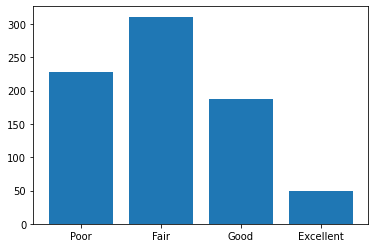

In [30]:
plt.bar(class_group['class'], height = class_group['count'])
plt.savefig('../result/Barplot of Metascore on 4 Levels.pdf')

### Find out 10 largest-budget films and 10 smallest-budget films

Analyze their characteristics in ratings.

In [11]:
largest = dataset.nlargest(10, ['budget'])
largest.describe()

,budget,Metascore
count,1.000000e+01,10.000000
mean,2.515000e+08,60.800000
std,1.355032e+07,11.707547
min,2.250000e+08,37.000000
25%,2.500000e+08,58.000000
50%,2.500000e+08,59.500000
75%,2.537500e+08,66.000000
max,2.800000e+08,78.000000


In [23]:
largest

,imdb_id,budget,Metascore,class
14,tt2395427,280000000,66.0,Good
432,tt0401729,260000000,51.0,Fair
641,tt1210819,255000000,37.0,Poor
194,tt2310332,250000000,59.0,Fair
203,tt1877832,250000000,75.0,Good
388,tt1345836,250000000,78.0,Good
392,tt0903624,250000000,58.0,Fair
571,tt1170358,250000000,66.0,Good
10,tt2379713,245000000,60.0,Fair
406,tt1409024,225000000,58.0,Fair


In [12]:
largest.groupby(['class'])['class'].count()

class
Fair    5
Good    4
Poor    1
Name: class, dtype: int64

In [13]:
smallest = dataset.nsmallest(10, ['budget'])
smallest.describe()

,budget,Metascore
count,10.000000,10.000000
mean,10892.400000,47.100000
std,31407.713169,14.955118
min,10.000000,30.000000
25%,15.000000,35.500000
50%,57.000000,42.500000
75%,515.000000,56.500000
max,100000.000000,74.000000


In [24]:
smallest

,imdb_id,budget,Metascore,class
366,tt2556874,10,32.0,Poor
758,tt3074732,10,74.0,Good
748,tt1828959,15,40.0,Poor
769,tt1699755,15,52.0,Fair
543,tt1710396,25,44.0,Fair
766,tt2991296,89,34.0,Poor
561,tt2129928,110,66.0,Good
775,tt2187884,650,58.0,Fair
554,tt2149360,8000,41.0,Fair
162,tt2309260,100000,30.0,Poor


In [14]:
smallest.groupby(['class'])['class'].count()

class
Fair    4
Good    2
Poor    4
Name: class, dtype: int64

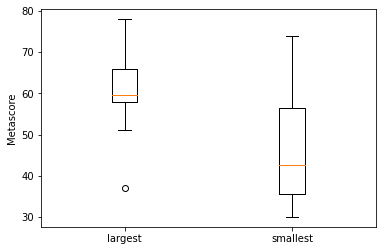

In [15]:
plt.boxplot([largest['Metascore'],smallest['Metascore']], labels = ('largest','smallest'))
plt.ylabel('Metascore')
plt.show()
#plt.boxplot(smallest['Metascore'])

### Simple Linear Regression Model

Find out whether there is a statistically significant association between budgets and Metascores by p-value.

Find out the coefficients of budgets in the model, i.e., how budgets affect ratings.

In [18]:
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence

In [19]:
reg = smf.ols('Metascore ~ budget', data=dataset).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:              Metascore   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     11.19
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           0.000861
Time:                        12:47:17   Log-Likelihood:                -3322.7
No. Observations:                 777   AIC:                             6649.
Df Residuals:                     775   BIC:                             6659.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.2939      0.794     63.368      0.0

In this model, the p-value (0.001) is quite small (less than 0.05) which means that there is a statistically significant association between the value of budget and the value of Metascore. In addition, it can be seen from the positive coefficient (3.981e-08) of budget and the plot below that there is an linear relationship between budget and Metascore, i.e., the value of Metascore increases as the value of budget increases.

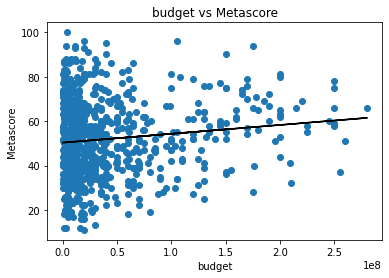

In [32]:
pred = reg.predict(dataset['budget'])
plt.scatter(dataset['budget'],dataset['Metascore'])
plt.plot(dataset['budget'],pred,color='black')
plt.title('budget vs Metascore')
plt.xlabel('budget')
plt.ylabel('Metascore')
plt.savefig('../result/budget vs Metascore.pdf')